# Prediction of apartment rent in cities in India with linear regression

Importing the libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Loading the dataset

In [15]:
rent_data = pd.read_csv('House_Rent_Dataset.csv')

# print the first 5 rows of the dataset
print(rent_data.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

# Analyzing the dataset

Printing the value counts of the column 'rent'

In [16]:
# print the count of rent values
print(rent_data['Rent'].value_counts())

15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: Rent, Length: 243, dtype: int64


We can see that some of the value counts are very low. We will remove them to get a better analysis.

In [17]:
# delete the rows with rent values that count less than 10
rent_data = rent_data[rent_data['Rent'].map(rent_data['Rent'].value_counts()) > 10]

Printing the value counts of the column 'size'

In [18]:
# print the count of size values
print(rent_data['Size'].value_counts())

1000    230
600     215
800     205
1200    187
500     176
       ... 
656       1
1660      1
413       1
1875      1
855       1
Name: Size, Length: 569, dtype: int64


We can see that some of the values in the column 'size' have a count less than 10. We will delete those rows to avoid bias.

In [19]:
# delete the rows with size values that count less than 10
rent_data = rent_data[rent_data['Size'].map(rent_data['Size'].value_counts()) > 10]


Printing the value counts of the column 'BHK'

In [20]:
# print the count of BHK values
print(rent_data['BHK'].value_counts())

2    1655
1     814
3     667
4      52
6       3
5       1
Name: BHK, dtype: int64


We can see that houses with a BHK value of 5 and 6 have much less values than the rest. We will delete those rows to avoid bias.

In [21]:
# delete the rows with BHK values that count less than 10
rent_data = rent_data[rent_data['BHK'].map(rent_data['BHK'].value_counts()) > 10]

Printing the value counts of the column 'city'

In [22]:
# print the count of city values
print(rent_data['City'].value_counts())

Bangalore    679
Hyderabad    624
Chennai      607
Mumbai       439
Kolkata      420
Delhi        419
Name: City, dtype: int64


We can see that the distributios is even. We will not delete any rows.

Dropping the columns that are not required for the model

In [23]:
# drop all columns except 'Size', 'BHK', 'City', 'Rent'
rent_data = rent_data.drop(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact'], axis=1)


In [24]:
# print the first 5 rows of the dataset
print(rent_data.head())

   BHK   Rent  Size     City
0    2  10000  1100  Kolkata
1    2  20000   800  Kolkata
2    2  17000  1000  Kolkata
3    2  10000   800  Kolkata
4    2   7500   850  Kolkata


# Preprocessing the dataset for the model

In [25]:
# prepare features for moddel fitting
predictors = ['Size', 'BHK', 'City']

data = rent_data[predictors]

target_name = 'Rent'
target = rent_data[target_name]

city_encoder = OneHotEncoder()
nominal_preprocessor = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor = StandardScaler()

city_attributes = ['City']
nominal_attributes = ['BHK']
numerical_attributes = ['Size']

preprocessor = ColumnTransformer([
    ('city', city_encoder, city_attributes),
    ('one-hot-enconder', nominal_preprocessor, nominal_attributes),
    ('standard-scaler', numerical_preprocessor, numerical_attributes)
])

data_prepared = preprocessor.fit_transform(data)

Sepating the data into train and test sets for the model

In [26]:
# separate the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(data_prepared, target, test_size=0.2, random_state=424)

# fitting the model

In [ ]:
# fit the model

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Analyzing the performance of the model

In [28]:
# check the performance of the model
# Performance on training data
predicted_y = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, predicted_y)

# Performance on test data
predicted_y = reg.predict(X_test)
test_mae = mean_absolute_error(y_test, predicted_y)

print("the mean absolute error on the training data is: %.2f" % train_mae)
print("the r-squared score is: %.2f" % r2_score(y_test, predicted_y))
print(f"and it's coefficients are: {reg.coef_}")

the mean absolute error on the training data is: 11100.27
the r-squared score is: 0.53
and it's coefficients are: [ -8295.55456053 -10140.95573798   -937.61130461 -14505.55497253
 -12168.33362114  46048.0101968  -15281.47372832 -14185.25227362
  -3464.81619652  32931.54219846   9559.27257088]


looking at the predicted values against the actual values of the test set

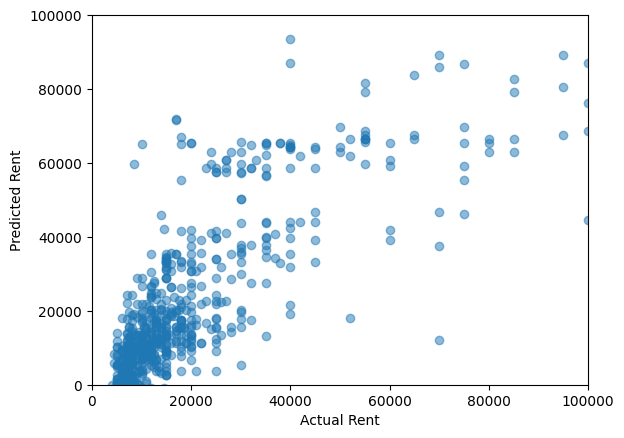

In [29]:
# plot the results of the model with limmit of 100000
plt.scatter(y_test, predicted_y, alpha=0.5)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.show()

# Allowing the user to input the values for the model to predict the rent

In [ ]:
# make predictions until the user wants to stop
while True:
    bhk = input('Enter the number of bedrooms/hallways/kitchens (more than 1): ')
    size = input('Enter the size of the house/apartment/flat in square feet (more than 200 feet): ')
    city = input('Enter the city name: \n 1. Bangalore \n 2. Chennai \n 3. Delhi \n 4. Hyderabad \n 5. Kolkata \n 6. Mumbai \n')

    input_data = pd.DataFrame([(size, bhk, city)], columns= predictors)
    input_data_prepared = preprocessor.transform(input_data)

    predicted_rent = reg.predict(input_data_prepared)

    print("the predicted rent is: %.2f" % predicted_rent)

    # ask the user if they want to make another prediction
    another_prediction = input('Do you want to make another prediction? (y/n): ')
    if another_prediction == 'n':
        break